# 차원과 차원축소
각양각색의 사진이 업로드 된다면 저장공간이 부족해진다.  
데이터가 가진 속성을 특성이라고 불렀고 과일 사진의 경우 10,000개의  
픽셀을 가졌기에 10,000개의 특성이 있는 셈이었다.  
이런 특성을 차원이라고 부른다.  
즉, 10,000개의 특성은 10,000개의 차원이라는 건데 이 차원을 줄일 수 있다면  
저장공간을 크게 절약할 수 있을 것이다.  
이를 위해 필요한 것이 바로 차원 축소 알고리즘이다.  

# 주성분 분석
주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것이라 할 수 있다.  
분산은 데이터가 널리 퍼진 정도를 말한다.  
분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있다.  


In [2]:
# 데이터를 불러온다. 지금까지 실수가 있었는데 -O는 반드시 대문자여야 한다.
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-04-08 13:08:38--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-04-08 13:08:38--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-04-08 13:08:38--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
# 실수를 바로잡자, 더이상 에러가 생기지 않으며 다른 방식으로 불러올 필요도 없어졌다.
import numpy as np
fruits= np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
# 배열 크기 확인
print(pca.components_.shape)

(50, 10000)


In [8]:
# 과일을 그리기 위해 필요한 zhem
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
  n = len(arr)        # n은 샘플의 개수
  # 한 줄에 10개씩 이미지를 그린다.
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

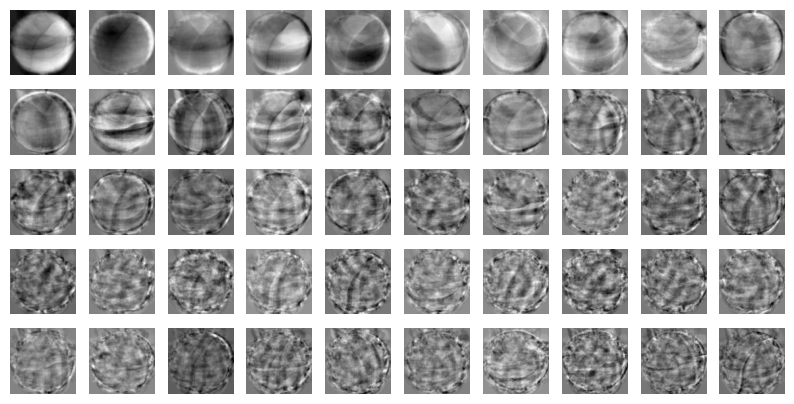

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
print(fruits_2d.shape)

(300, 10000)


In [11]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성
앞에서 10,000개의 특성을 50개로 줄였다.  
이로 인해 손실이 발생했을 것이다.  
하지만 분산이 큰 방향으로 데이터를 투영했기에  
원본데이터의 상당 부분 재구성 할 수 있다.

In [12]:
# 특성 복원, 10,000개의 특성을 복원한다.
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


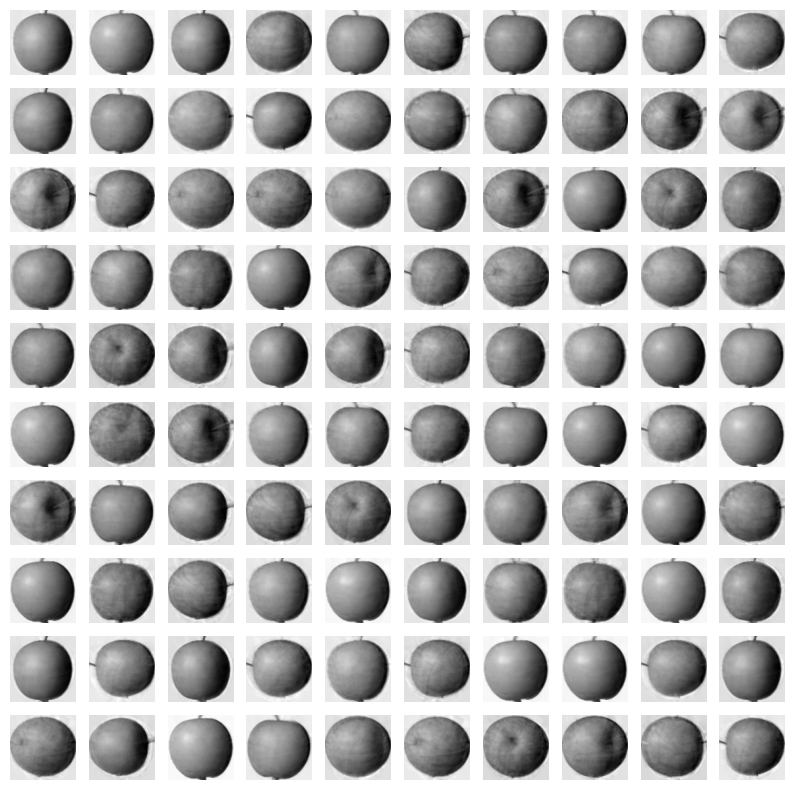

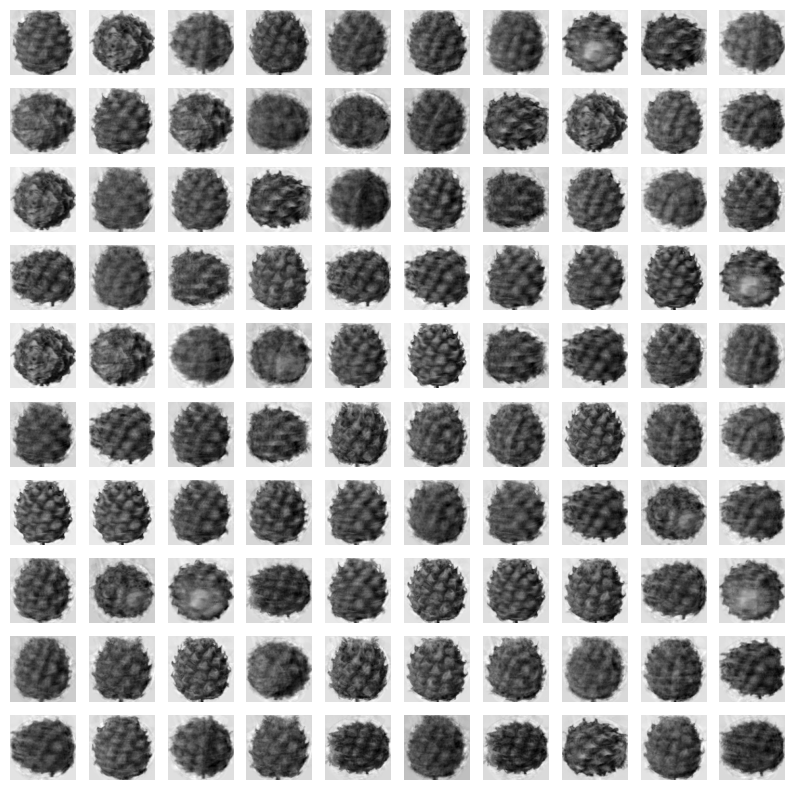

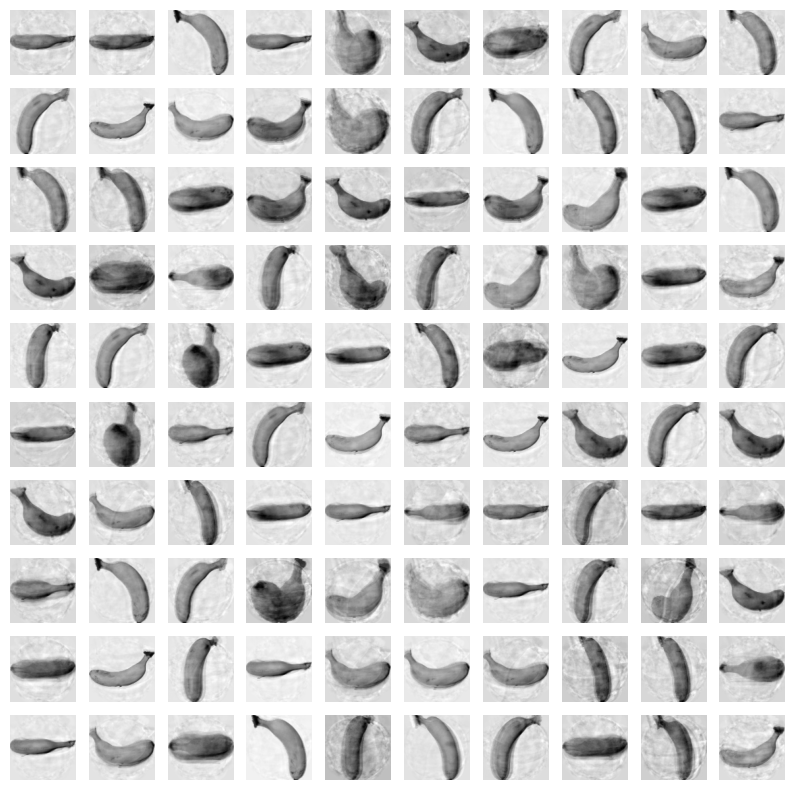

In [14]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

일부 흐리거나 번져진 부분이 있지만 그래도 제법 훌륭하게 복원했다.

# 설명된 분산
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라 한다.  


In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.9215284343778525


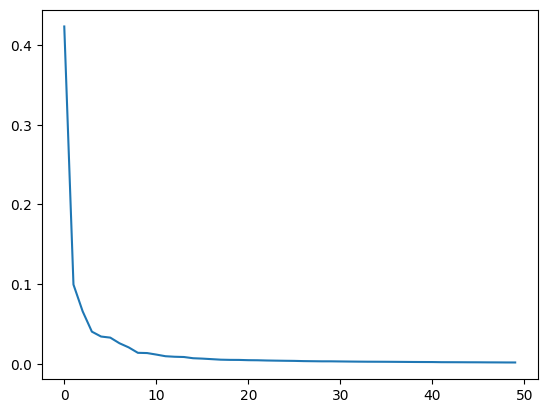

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 다른 알고리즘과 함께 사용하기
사이킷런의 로지스틱 회귀 모델과 함께 사용하기

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [19]:
# 지도학습 모델을 사용하기 위한 타깃 값
target = np.array([0]*100 + [1] * 100 + [2] * 100)

In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.239871883392334


In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


1.0
0.01834902763366699


In [24]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [25]:
print(pca.n_components_)

2


In [27]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [30]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.02337512969970703


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts= True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


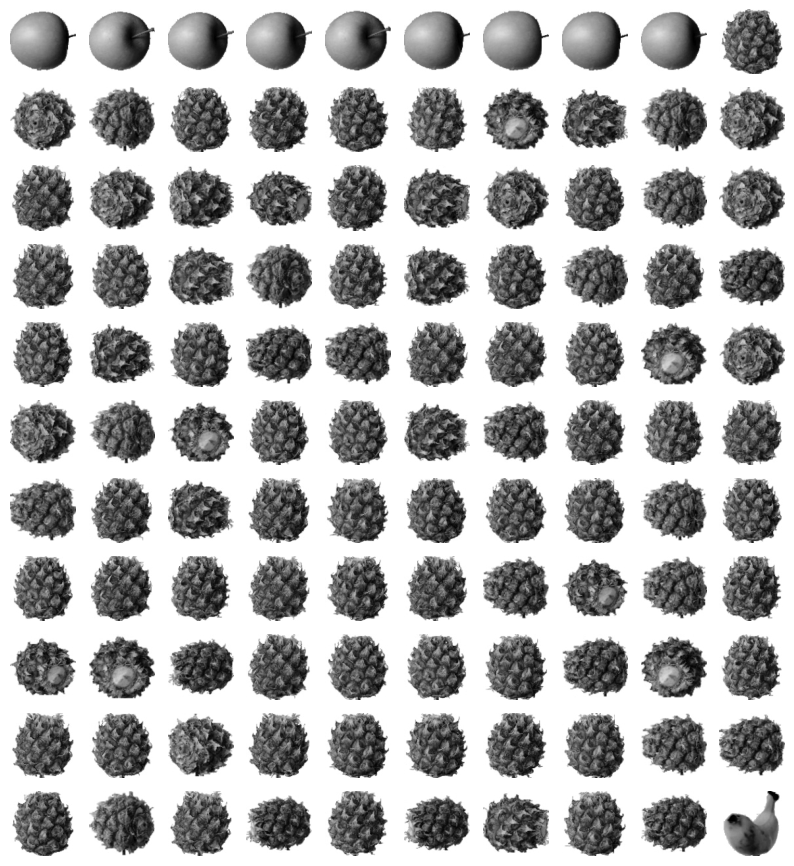

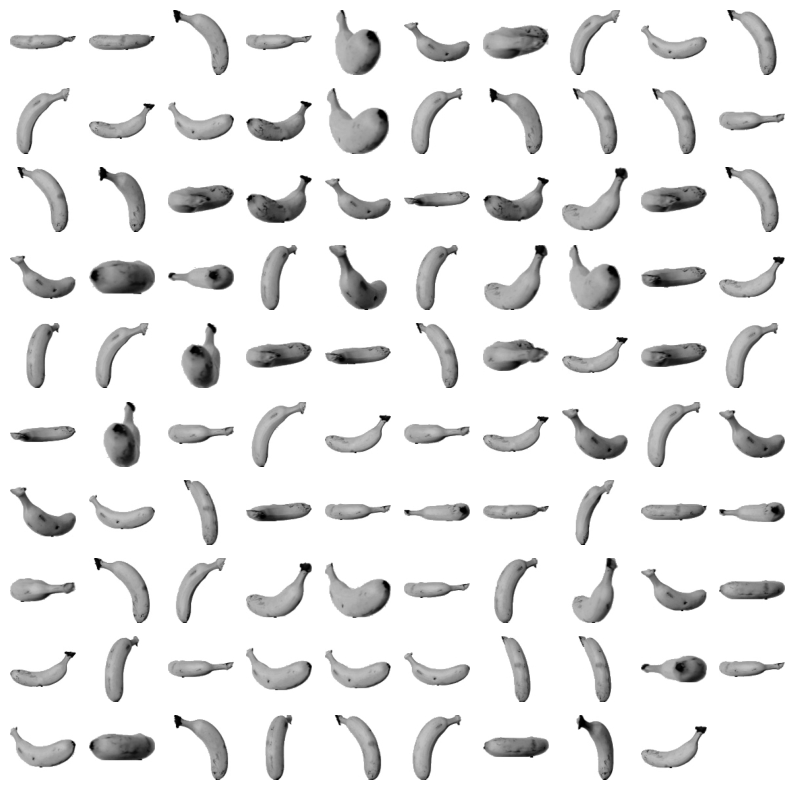

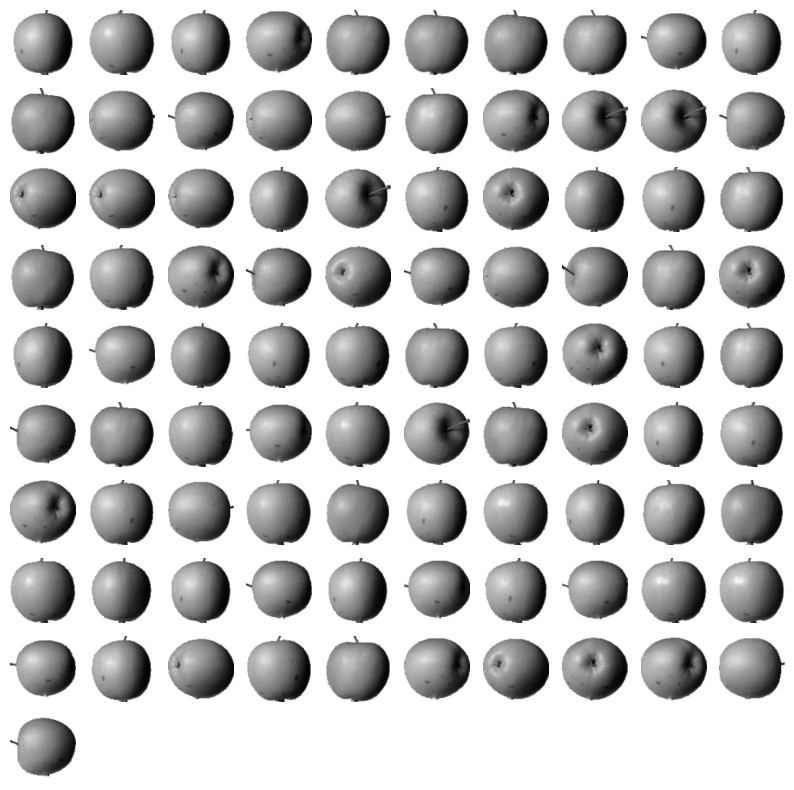

In [32]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

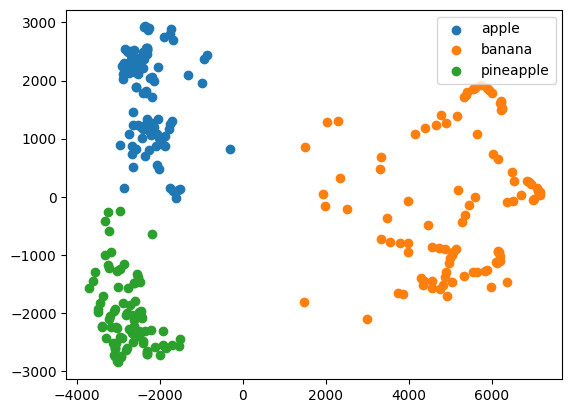

In [34]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

클러스터간 산점도가 아주 잘 구분된다.  
2개의 특성만 사용해도 교차검증 점수가 99%에 달하는 이유가 여기 있다.  
단, 일부 클러스터의 경계가 서로 꽤나 가깝다.  
이들은 혼동을 일으키기 쉽다.  


# 정리
###■ 차원 축소
원본데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류다.  
차원 축소는 저장 공간을 줄이고 시각화하기 쉽다.  
또한 다른 알고리즘의 성능을 높일 수도 있다.  
###■ 주성분 분석
차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법이다.  
이런 방향을 주성분이라고 한다.  
###■ 설명된 분산
주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것
